<a href="https://colab.research.google.com/github/shuphy124/deeplearning_notes/blob/master/section3/3-1-trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris

## 3-1. 本章节的目标
本节我们导入有监督的神经网络，即$q_\theta(y|{\bf x})$的模型。 首先，什么是神经网络？

考虑函数
$$
{\bf x} 
\overset{\text{linear}}{\to}
\cdot
\overset{\text{non-linear}}{\to}
{\bf h}_1
\overset{\text{linear}}{\to}
\cdot
\overset{\text{non-linear}}{\to}
{\bf h}_2
\to \dots
\to
{\bf h}_L，
$$
通常我们**固定非线性变换**并**更改线性变换的参数**，以使输出期望的数值${\bf h}_L$。 下面，我们使用 [TensorFlow](https://www.tensorflow.org)，利用简单的神经网络配置来分类之前的Ayame 数据。之后，在接下来的小节中，我们解释中的每个部分的细节。

### 使用Ayame数据的有监督神经网
下边我们读取Ayame数据

In [15]:
iris = load_iris() # 读取Ayame数据

该对象包含各种数据。 尤其是本次将利用
- `iris.data`: 输入 ${\bf x}_n$ 数据
- `iris.target`: 期望的答案 ${\bf y}_n$ 数据
将 间隔为2的偶数index作为训练数据：

In [16]:
X_train, Y_train = iris.data[::2], iris.target[::2] # 偶数数据

#### 神经网络
神经网络被实现为一个类。 以下设计

$$
{\ bf x} (4D) \to {\ bf h}_1 (10D) \to {\ bf h}_2 (3D).
$$



In [17]:
H=10
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(H, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

这里，`activation ='softmax'` 指定了所谓的 softmax 函数

$$
\text{softmax}({\bf u}) = \frac{1}{\sum_{i} e^{u^i}} (e^{u^1}, e^{u^2}, \dots, e^{u^{dim}}).
$$
 此外，`activation ='relu'` 是
$$
\text{relu}({\bf u}) = (\max\{0, u^1\}, \max\{0, u^2\}, \dots, \max\{0, u^{dim}.\})
$$


#### 学习设置
设置目标函数以及如何使其更小

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

`optimizer ='adam'` 显示所使用的优化方法，`loss ='sparse_categorical_crossentropy'` 将一个被称为交叉熵的函数作为经验误差。 这里，分类数是3，所以如${\bf y}_{model} \in [0,1]^3, y \in \{0,1,2\}$
$$
cross\_entropy({\bf y}_{model}, y) = - \log ({\bf y}_{model})^{y\text{-th component}}
$$

> 这里有排除sparse的`loss ='categorical_crossentropy'`。其与当监督信号是像${\bf y} = (0,1,0)$的正确答案时是1，此外的值时是0的向量形式时所使用的值是基本相同的。

#### 学习执行
在 Tensorflow 的情况下，它可以使用 `model.fit (X, Y)` 进行训练。 如果要进行更详细的设置，后面会介绍。

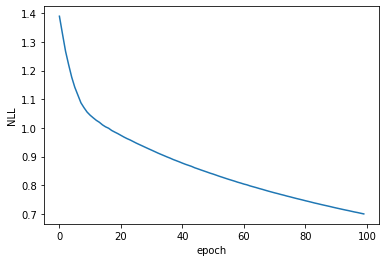

In [19]:
Hist= model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)
# 学习曲线的plot
plt.xlabel("epoch"); plt.ylabel("NLL")
plt.plot(np.arange(100), Hist.history['loss']);plt.show()

#### 利用新数据测试 

In [21]:
X_test, Y_test = iris.data[1::2], iris.target[1::2]

answer: [2] prediction: 2


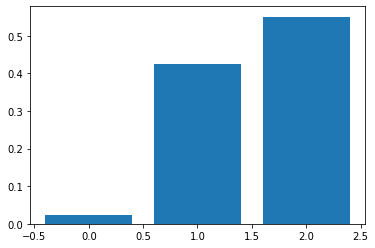

In [22]:
i = np.random.randint(len(Y_test))
x, y = X_test[i:i+1], Y_test[i:i+1]
y_pred = model.predict(x)
print('answer:', y, 'prediction:', np.argmax(y_pred))
plt.bar(np.arange(3), y_pred[0]); plt.show()

可以看到它们被正确分类。